In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import cv2

from tensorflow.keras import layers
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from sklearn.model_selection import train_test_split

In [2]:
train_dir = "./ksl"

In [3]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [4]:
data_generator = ImageDataGenerator(
    samplewise_center=True, 
    samplewise_std_normalization=True,
    brightness_range=[0.8, 1.0],
    zoom_range=[1.0, 1.2],
    validation_split=0.2
)

train_generator = data_generator.flow_from_directory(train_dir, target_size=(224, 224), shuffle=True, seed=13,
                                                     class_mode='categorical', batch_size=10, subset="training")

validation_generator = data_generator.flow_from_directory(train_dir, target_size=(224, 224), shuffle=True, seed=13,
                                                          class_mode='categorical', batch_size=10, subset="validation")

Found 3701 images belonging to 11 classes.
Found 921 images belonging to 11 classes.


In [5]:
# WEIGHTS_FILE = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# inception_v3_model = keras.applications.inception_v3.InceptionV3(
#     input_shape = (224, 224, 3), 
#     include_top = False, 
#     weights = 'imagenet'
# )

In [6]:
# inception_output_layer = inception_v3_model.get_layer('mixed7')
# print('Inception model output shape:', inception_output_layer.output_shape)

# inception_output = inception_v3_model.output

In [7]:
# x = layers.GlobalAveragePooling2D()(inception_output)
# x = layers.Dense(1024, activation='relu')(x)                  
# x = layers.Dense(11, activation='softmax')(x)           

# model = Model(inception_v3_model.input, x) 

# model.compile(
#     optimizer=SGD(lr=0.0001, momentum=0.9),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# for layer in model.layers[:249]:
#     layer.trainable = False
# for layer in model.layers[249:]:
#     layer.trainable = True

In [8]:
# LOSS_THRESHOLD = 0.2
# ACCURACY_THRESHOLD = 0.95

# class ModelCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if logs.get('val_loss') <= LOSS_THRESHOLD and logs.get('val_acc') >= ACCURACY_THRESHOLD:
#             print("\nReached", ACCURACY_THRESHOLD * 100, "accuracy, Stopping!")
#             self.model.stop_training = True

# callback = ModelCallback()

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),

                 activation='relu',

                 input_shape=(224, 224,3)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(11, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.0001, momentum=0.9), metrics=['accuracy'])


In [10]:
history = model.fit(
            train_generator,
            validation_data=validation_generator,
            steps_per_epoch=10,
            validation_steps=50,
            epochs=10
          )

Epoch 1/10
10/10 [==============================] - 32s 3s/step - loss: 2.1544 - accuracy: 0.2900 - val_loss: 2.0589 - val_accuracy: 0.3600
Epoch 2/10
10/10 [==============================] - 33s 3s/step - loss: 1.6351 - accuracy: 0.4400 - val_loss: 1.6026 - val_accuracy: 0.4260
Epoch 3/10
10/10 [==============================] - 31s 3s/step - loss: 1.0824 - accuracy: 0.7500 - val_loss: 1.4878 - val_accuracy: 0.4220
Epoch 4/10
10/10 [==============================] - 31s 3s/step - loss: 0.7400 - accuracy: 0.7363 - val_loss: 1.3508 - val_accuracy: 0.6020
Epoch 5/10
10/10 [==============================] - 31s 3s/step - loss: 0.6882 - accuracy: 0.7800 - val_loss: 1.2922 - val_accuracy: 0.5640
Epoch 6/10
10/10 [==============================] - 31s 3s/step - loss: 0.4693 - accuracy: 0.8700 - val_loss: 0.9473 - val_accuracy: 0.6760
Epoch 7/10
10/10 [==============================] - 31s 3s/step - loss: 0.3167 - accuracy: 0.8900 - val_loss: 0.8915 - val_accuracy: 0.6880
Epoch 8/10
10/10 [==

In [11]:
print("-- Evaluate --")

scores = model.evaluate(validation_generator, steps=5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
5/5 [==============================] - 1s 257ms/step - loss: 0.9800 - accuracy: 0.7000
accuracy: 70.00%


In [12]:
model.save('ksl-model-2.h5')

-- Predict --
{'나중에': 0, '놀다': 1, '뭐했어요': 2, '반갑습니다': 3, '부산': 4, '오늘': 5, '오세요': 6, '요리': 7, '저는': 8, '좋아합니다': 9, '취미': 10}
[[0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]]


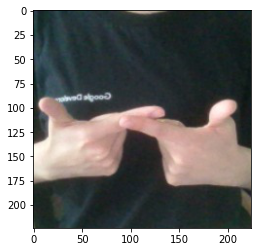

In [34]:
print("-- Predict --")

img = image.load_img('./ksl/부산/200.jpg')

plt.imshow(img)

img = (np.expand_dims(img, 0))

output = model.predict(img)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(validation_generator.class_indices)

print(output)